In [22]:
from model import Model

import numpy as np

import matplotlib.pyplot as plt

import json

## Parameter Space Exploration

In [23]:
T_grid, beta_grid, logM_grid = np.linspace(10,  100, N := 200), np.linspace(0.2, 2.5, N), np.linspace(5,   10,  N)     

T_vals, beta_vals, logM_vals = np.meshgrid(T_grid, beta_grid, logM_grid, indexing="ij")

M_vals = 10**logM_vals

z = 7

m = Model(z=z)

In [24]:
with open("rms.json", "r") as f:
    BAND = json.load(f)

nu_rest = np.array([BAND["4"]["obs_nu"], BAND["6"]["obs_nu"], BAND["8"]["obs_nu"]]) * (1 + z)

fluxes = [m.SED(nu, T_vals, beta_vals, M_vals) for nu in nu_rest]

SNR = [flux / BAND[i]["rms"] for i, flux in zip(BAND.keys(), fluxes)]

SNR_treshold  = 5
band_treshold = 1

detections = np.sum([(SNR[i] > SNR_treshold).astype(int) for i in range(len(SNR))], axis=0) >= band_treshold

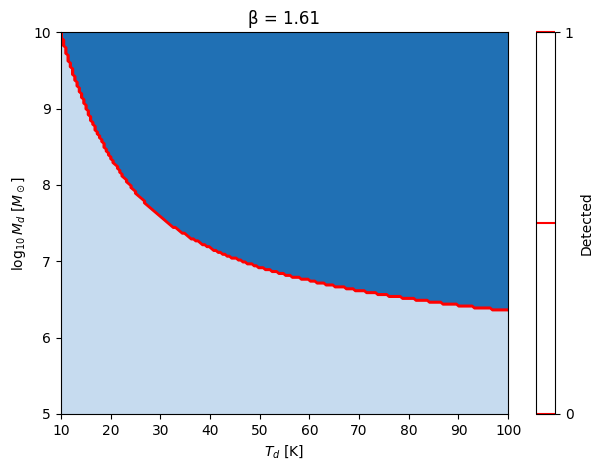

In [25]:
i = 122

plt.contourf(T_grid, logM_grid, detections[:, i, :].T, levels=1, cmap='Blues')
plt.contour(T_grid, logM_grid, detections[:, i, :].T, levels=1, colors='red')
plt.xlabel("$T_d$ [K]")
plt.ylabel("$\\log_{10} M_d$ [$M_\\odot$]")
plt.title(f"β = {beta_grid[i]:.2f}")
plt.colorbar(label="Detected", ticks=[0, 1])
plt.tight_layout()
plt.show()